<a href="https://colab.research.google.com/github/Kyleho1/ML-work/blob/main/ML_Classification_Breast_Cancer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files

# Upload data.csv from your local machine
uploaded = files.upload()

Saving data.csv to data (1).csv


In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, in_features = 30, h1 = 20, h2 = 20, h3 = 20, h4 = 20, out_features = 2):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,h4)
    self.out = nn.Linear(h2,out_features)

    #relu = rectified linear unit
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.out(x)
    return x

In [111]:
torch.manual_seed(25)

model = Model()



In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data.csv')

#change diagnosis
data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})
data.head()
#print(data.columns.tolist())



<ipython-input-112-e0eb8c5d7d23>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
#training test split
X = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'],axis = 1).values
y = data['diagnosis'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)


In [122]:


X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

epochs = 2000
losses = []


for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)

  if i %20 == 0:
    losses.append(loss.detach().numpy())#loss is a tensor so we are changing it back
    #print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.007359504234045744
Epoch: 20 Loss: 0.05233532562851906
Epoch: 40 Loss: 0.028874311596155167
Epoch: 60 Loss: 0.013139178976416588
Epoch: 80 Loss: 0.011665495112538338
Epoch: 100 Loss: 0.011076965369284153
Epoch: 120 Loss: 0.010891273617744446
Epoch: 140 Loss: 0.010768135078251362
Epoch: 160 Loss: 0.010670467279851437
Epoch: 180 Loss: 0.010589937679469585
Epoch: 200 Loss: 0.010512059554457664
Epoch: 220 Loss: 0.010444757528603077
Epoch: 240 Loss: 0.010367375798523426
Epoch: 260 Loss: 0.010297272354364395
Epoch: 280 Loss: 0.010235035791993141
Epoch: 300 Loss: 0.010172468610107899
Epoch: 320 Loss: 0.01011468656361103
Epoch: 340 Loss: 0.010064155794680119
Epoch: 360 Loss: 0.010024326853454113
Epoch: 380 Loss: 0.009972479194402695
Epoch: 400 Loss: 0.00994088128209114
Epoch: 420 Loss: 0.009893215261399746
Epoch: 440 Loss: 0.009862049482762814
Epoch: 460 Loss: 0.00982631091028452
Epoch: 480 Loss: 0.009786727838218212
Epoch: 500 Loss: 0.009751193225383759
Epoch: 520 Loss: 0.009

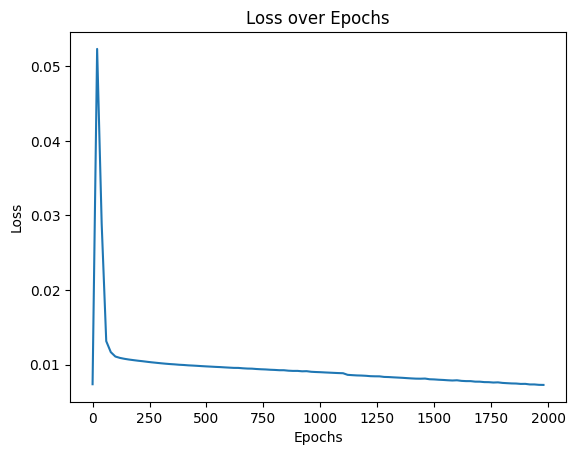

In [124]:
plt.plot(range(0, epochs, 20), losses)  # Plot losses for every 20 epochs
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss over Epochs')
plt.show()

In [126]:
#Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): #turn off back propogation
    y_eval = model.forward(X_test)#x_test are features from the test set and y_eval is the predictions
    loss = criterion(y_eval, y_test) # Find the loss/error
    #loss should be lower

In [127]:
loss

tensor(1.3632)

In [128]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model(data)
        if y_test[i] == 0:
          result = "Benign"
        else:
          result = "malignant"
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {result}') #look at highest number of the three and that element is the one it thinks the flower is
        # so if if its tensor([-3.9107,  4.2050,  6.9140]) then its the third flower and from before {'Setosa':0,'Versicolor':1,'Virginica':2}
        # it thinks its a virg
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([ 43.9915, -44.4950]) 	 0 	 Benign
2.) tensor([ 28.7021, -29.8894]) 	 0 	 Benign
3.) tensor([ 37.6847, -38.5228]) 	 0 	 Benign
4.) tensor([ 24.9020, -26.0733]) 	 0 	 Benign
5.) tensor([ 17.0561, -18.4011]) 	 0 	 Benign
6.) tensor([ 48.4580, -48.8982]) 	 0 	 Benign
7.) tensor([ 49.4340, -49.7019]) 	 0 	 Benign
8.) tensor([ 51.6507, -51.9826]) 	 0 	 Benign
9.) tensor([ 37.1732, -37.8587]) 	 0 	 Benign
10.) tensor([ 18.5939, -19.8832]) 	 0 	 Benign
11.) tensor([ 24.1498, -25.5007]) 	 0 	 Benign
12.) tensor([ 46.2142, -46.9330]) 	 0 	 Benign
13.) tensor([-16.2131,  20.3531]) 	 1 	 malignant
14.) tensor([-24.4673,  30.6972]) 	 1 	 malignant
15.) tensor([-31.0661,  38.4021]) 	 1 	 malignant
16.) tensor([-3.3786,  5.0345]) 	 0 	 Benign
17.) tensor([-1.0320,  3.3847]) 	 0 	 Benign
18.) tensor([ 30.8258, -32.0467]) 	 0 	 Benign
19.) tensor([ 32.5409, -33.3207]) 	 0 	 Benign
20.) tensor([-40.8549,  51.3846]) 	 1 	 malignant
21.) tensor([ 10.9512, -12.1575]) 	 0 	 Benign
22.) tensor([ 